# Programming Assignment 2
## Goals
- Understand the Sampling Theorem using image signals.
- Implement Sampling & Decimation and Interpolation of discrete-time signals.
- Understand the Aliasing and its effects
## Problems
1. Apply Downsampling to an Image
2. Apply Upsampling to the Downsampled Image
3. Avoid aliasing with Low-Pass Filter
4. Repeat Steps 1 and 2 to the Band-Limited Image

### Utils

In [1]:
# import libraries
import cv2 # OpenCV for image processing
import matplotlib.pyplot as plt # Matplotlib for plotting images
import numpy as np # NumPy for numerical operations

In [2]:
def conv_horizontal(image, kernel):
    H, W, C = image.shape
    result = image.copy()
    for i in range(H):
        for c in range(C):
            result[i, :, c] = np.convolve(image[i, :, c], kernel, mode='same')
    return result

def conv_vertical(image, kernel):
    H, W, C = image.shape
    result = image.copy()
    for j in range(W):
        for c in range(C):
            result[:, j, c] = np.convolve(image[:, j, c], kernel, mode='same')
    return result

def conv2d(image, kernel):
    H, W, C = image.shape
    temp = np.zeros_like(image)
    result = np.zeros_like(image)
    for i in range(H):
        for c in range(C):
            temp[i, :, c] = np.convolve(image[i, :, c], kernel, mode='same')
    for j in range(W):
        for c in range(C):
            result[:, j, c] = np.convolve(temp[:, j, c], kernel, mode='same')
    return result

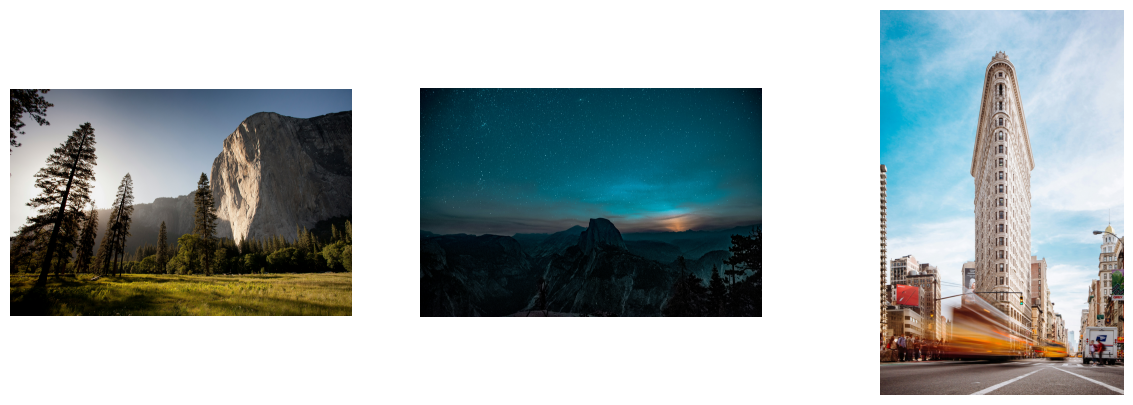

In [3]:
# set number of images
NUM_IMAGES = 3

# load the images and convert them to RGB format
image_set = [cv2.imread(f'./image/{i}.jpg') for i in range(1, 1 + NUM_IMAGES)]
image_set = list(map(lambda img: cv2.cvtColor(img, cv2.COLOR_BGR2RGB), image_set))

plt.figure(figsize=(15, 5))
for i, image in enumerate(image_set):
    plt.subplot(1, NUM_IMAGES, i + 1)
    plt.imshow(image)
    plt.axis('off')
plt.show()

## 1. Apply Downsampling to an Image
- Apply impulse-train sampling to an image.
- Perform decimation to reduce the image resolution

### Apply impulse-train sampling

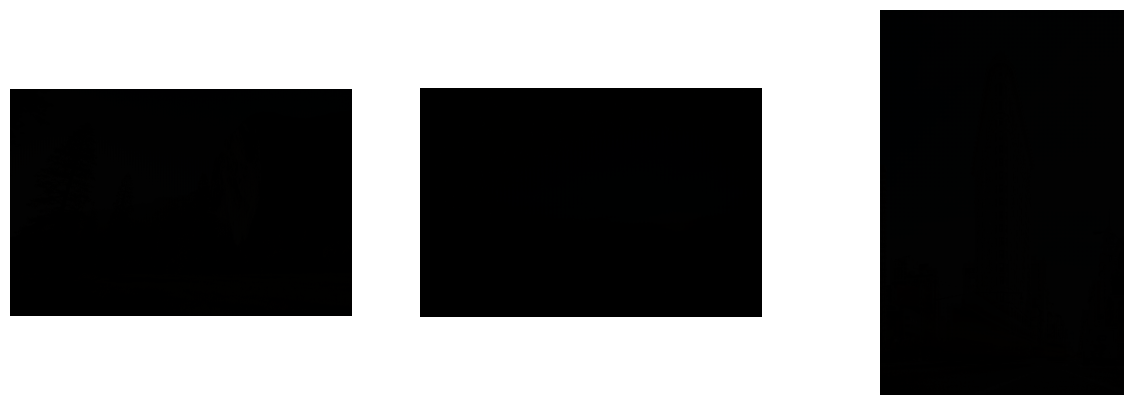

In [4]:
# Sampling constants
SAMPLING_N = 10

# Sampling function
def impulse_function(input, x, y, N, channel=1):
    return input if x % N == 0 and y % N == 0 else [0] * channel
    
def sample_image(image, N):
    height, width, channels = image.shape
    sampled_image = image.copy()
    for i, row in enumerate(image):
        for j, pixel in enumerate(row):
            sampled_image[i, j] = impulse_function(pixel, i, j, N, channels)
    return sampled_image


sampled_image_set = [sample_image(image, SAMPLING_N) for image in image_set]

plt.figure(figsize=(15, 5))
for i, image in enumerate(sampled_image_set):
    plt.subplot(1, NUM_IMAGES, i + 1)
    plt.imshow(image)
    plt.axis('off')
plt.show()

Since the pictures above are black because those resolution is to big. So I will zoom in those pictures.

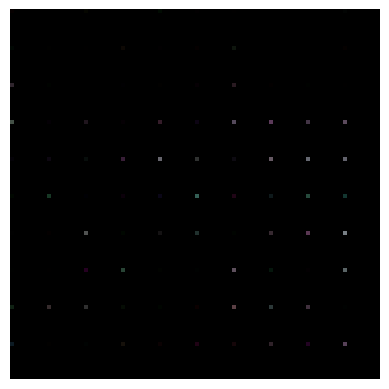

In [5]:
plt.figure()
plt.imshow(sampled_image_set[0][300:400, 300:400])
plt.axis('off')
plt.show()

### Perform decimation to reduce the image resolution

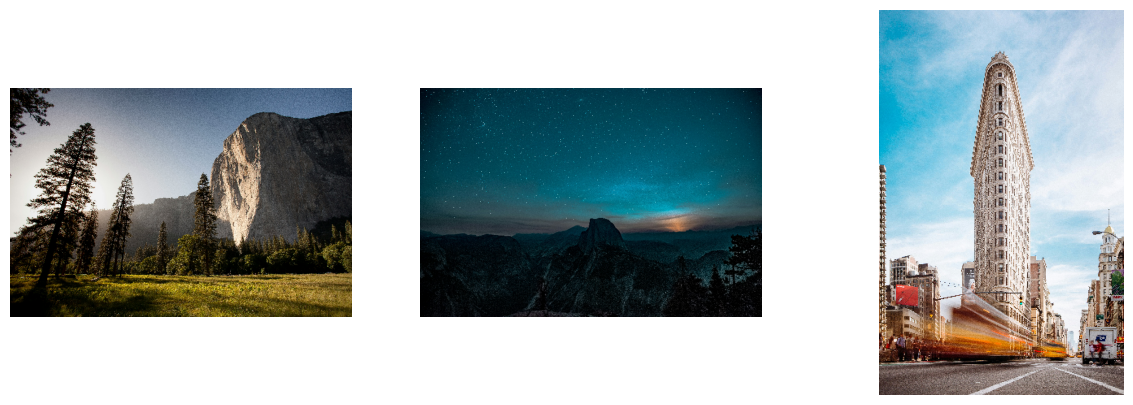

In [6]:
def decimation(image, N):
    return image[::N, ::N]

decimated_image_set = [decimation(image, SAMPLING_N) for image in image_set]

plt.figure(figsize=(15, 5))
for i, image in enumerate(decimated_image_set):
    plt.subplot(1, NUM_IMAGES, i + 1)
    plt.imshow(image)
    plt.axis('off')
plt.show()

## 2. Apply Upsampling to the Downsampled Image
- Reconstruction the image using **nearest-neighbor interpolation**.
- Design **bilinear interpolation** using 2D convolution.
- Compare the results of two interpolation methods and discuss the result.

### Reconstruction the image using **nearest-neighbor interpolation**

In [7]:
def nearest_neighbor_kernel(N):
    return np.array([1] * N + [0] * N, dtype=np.uint8)

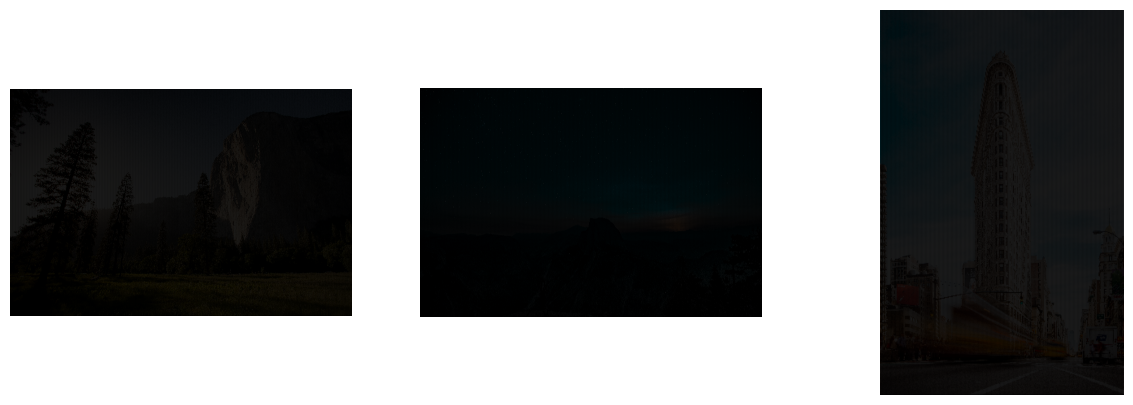

In [8]:
nearest_neighbor_1d_vertical_image_set = [conv_vertical(image, nearest_neighbor_kernel(SAMPLING_N)) for image in sampled_image_set]

plt.figure(figsize=(15, 5))
for i, image in enumerate(nearest_neighbor_1d_vertical_image_set):
    plt.subplot(1, NUM_IMAGES, i + 1)
    plt.imshow(image)
    plt.axis('off')
plt.show()


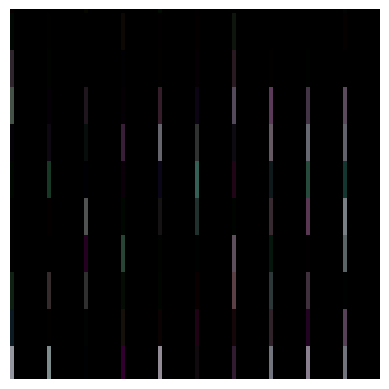

In [9]:
plt.figure()
plt.imshow(nearest_neighbor_1d_vertical_image_set[0][300:400, 300:400])
plt.axis('off')
plt.show()

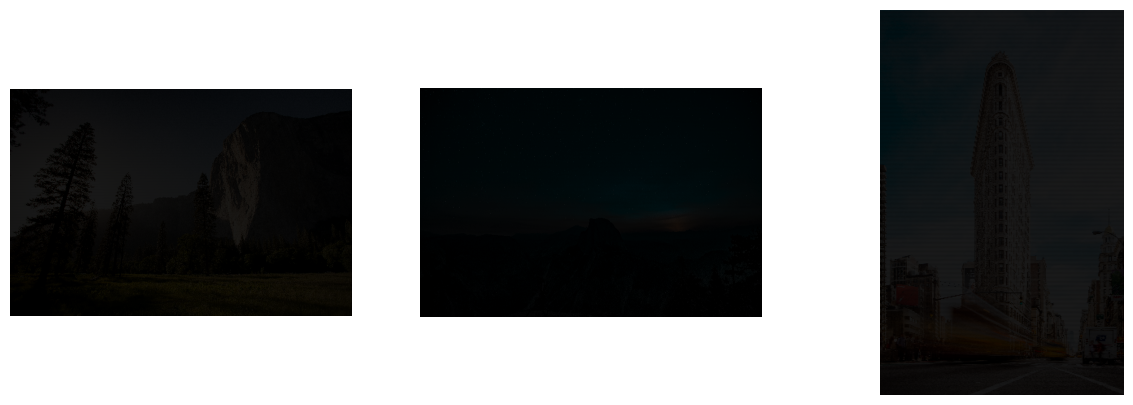

In [10]:
nearest_neighbor_1d_horizontal_image_set = [conv_horizontal(image, nearest_neighbor_kernel(SAMPLING_N)) for image in sampled_image_set]

plt.figure(figsize=(15, 5))
for i, image in enumerate(nearest_neighbor_1d_horizontal_image_set):
    plt.subplot(1, NUM_IMAGES, i + 1)
    plt.imshow(image)
    plt.axis('off')
plt.show()

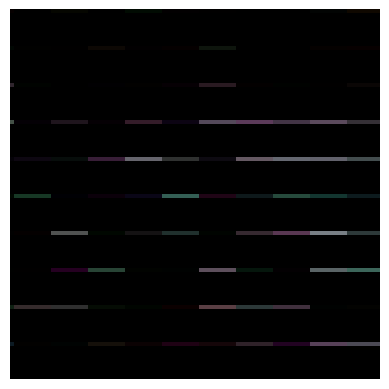

In [11]:
plt.figure()
plt.imshow(nearest_neighbor_1d_horizontal_image_set[0][300:400, 300:400])
plt.axis('off')
plt.show()

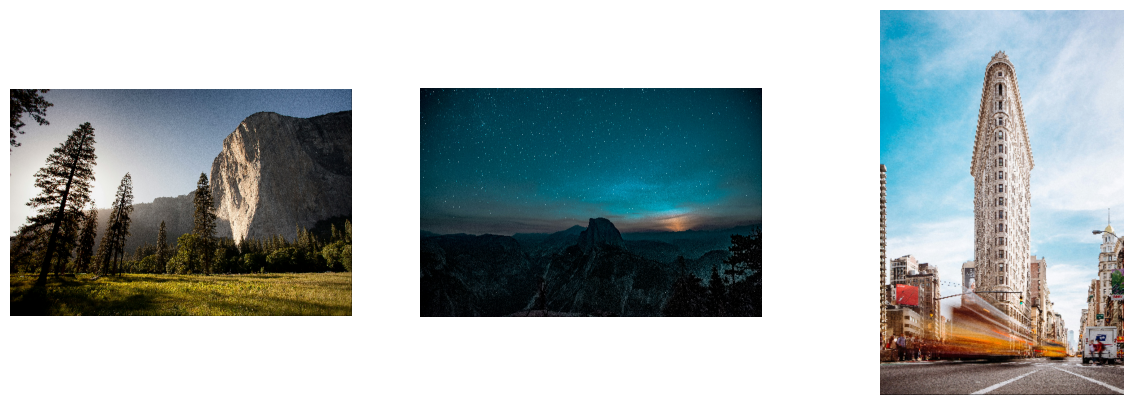

In [12]:
nearest_neighbor_2d_image_set = [conv2d(image, nearest_neighbor_kernel(SAMPLING_N)) for image in sampled_image_set]

plt.figure(figsize=(15, 5))
for i, image in enumerate(nearest_neighbor_2d_image_set):
    plt.subplot(1, NUM_IMAGES, i + 1)
    plt.imshow(image)
    plt.axis('off')
plt.show()

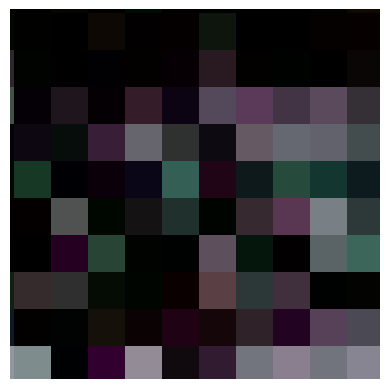

In [13]:
plt.figure()
plt.imshow(nearest_neighbor_2d_image_set[0][300:400, 300:400])
plt.axis('off')
plt.show()

### Reconstruction using bilinear interpolation

In [14]:
def bilinear_kernel(N):
    return np.array([i for i in range(0, N+1)] + [i for i in range(N-1, -1, -1)]) / N

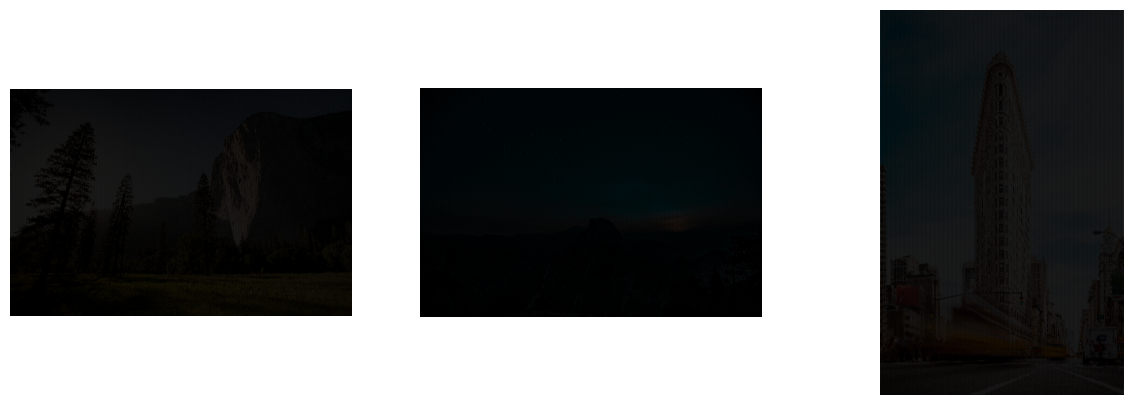

In [15]:
bilinear_1d_vertical_image_set = [conv_vertical(image, bilinear_kernel(SAMPLING_N)) for image in sampled_image_set]

plt.figure(figsize=(15, 5))
for i, image in enumerate(bilinear_1d_vertical_image_set):
    plt.subplot(1, NUM_IMAGES, i + 1)
    plt.imshow(image)
    plt.axis('off')
plt.show()

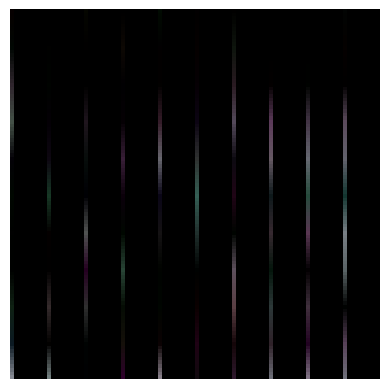

In [16]:
plt.figure()
plt.imshow(bilinear_1d_vertical_image_set[0][300:400, 300:400])
plt.axis('off')
plt.show()

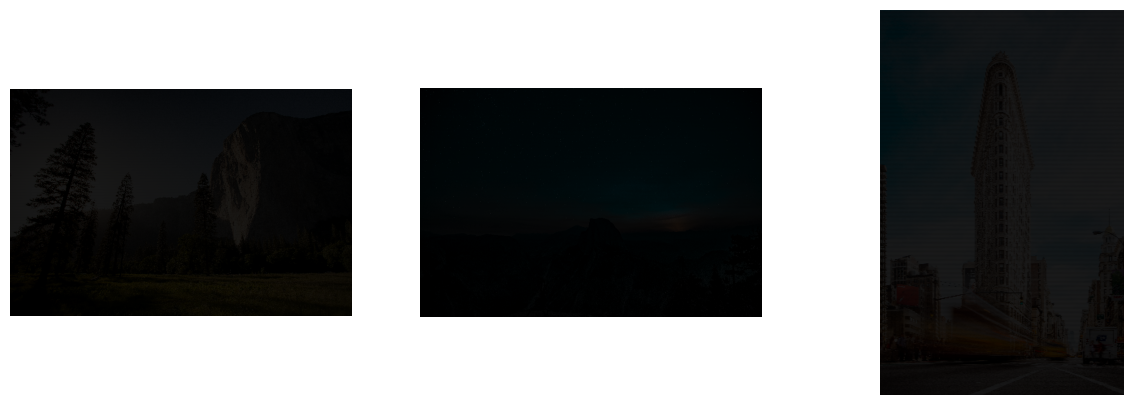

In [17]:
bilinear_1d_horizontal_image_set = [conv_horizontal(image, bilinear_kernel(SAMPLING_N)) for image in sampled_image_set]
plt.figure(figsize=(15, 5))

for i, image in enumerate(bilinear_1d_horizontal_image_set):
    plt.subplot(1, NUM_IMAGES, i + 1)
    plt.imshow(image)
    plt.axis('off')
plt.show()

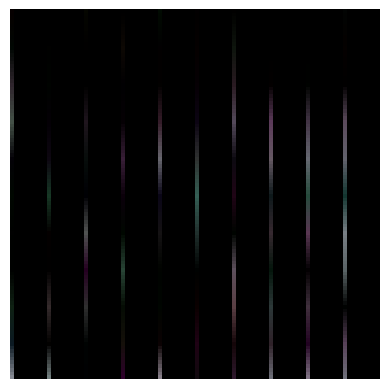

In [18]:
plt.figure()
plt.imshow(bilinear_1d_vertical_image_set[0][300:400, 300:400])
plt.axis('off')
plt.show()

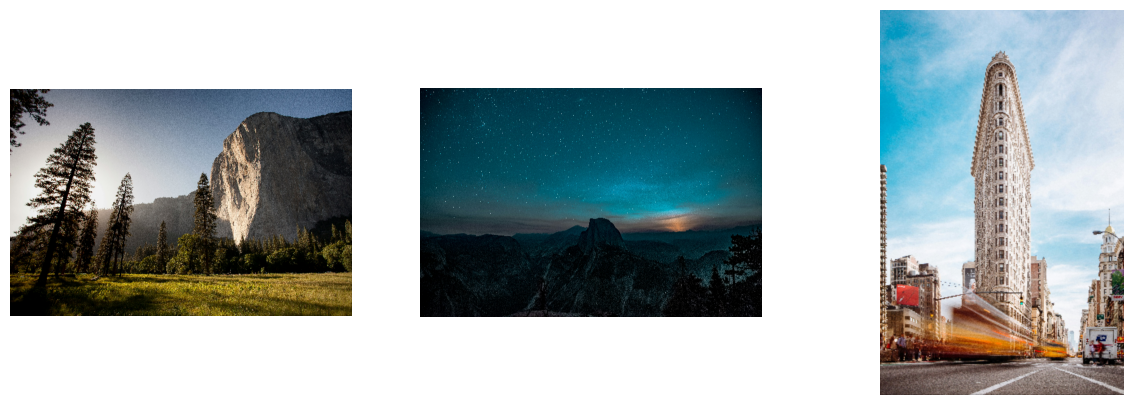

In [19]:
bilinear_2d_image_set = [conv2d(image, bilinear_kernel(SAMPLING_N)) for image in sampled_image_set]

plt.figure(figsize=(15, 5))
for i, image in enumerate(bilinear_2d_image_set):
    plt.subplot(1, NUM_IMAGES, i + 1)
    plt.imshow(image)
    plt.axis('off')
plt.show()

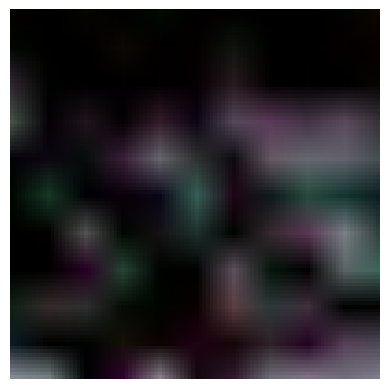

In [20]:
plt.figure()
plt.imshow(bilinear_2d_image_set[0][300:400, 300:400])
plt.axis('off')
plt.show()

### Compare two result

First, I compare the whole image. As below, we can see bilinear interpolation's result is more smoother than neighbor-nearest one.  
However, two result are not clear compare to original one.

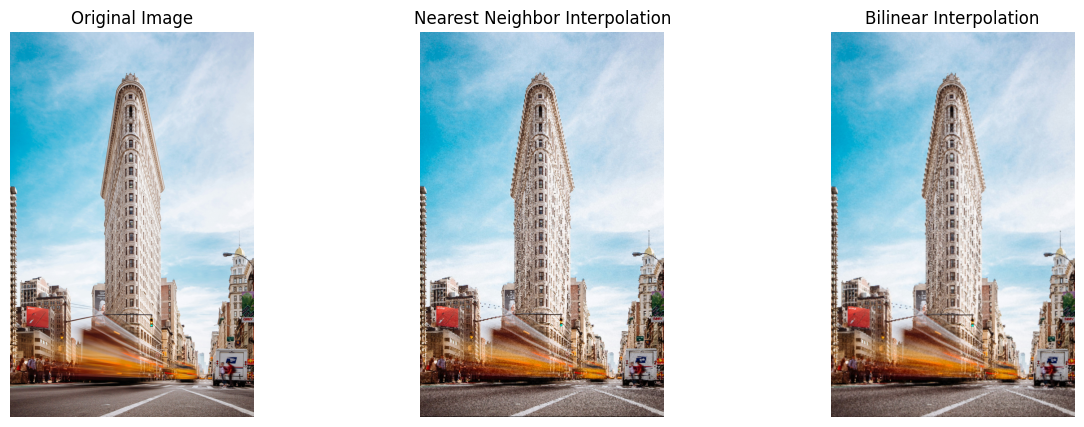

In [21]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(image_set[2])
plt.axis('off')
plt.title('Original Image')
plt.subplot(1, 3, 2)
plt.imshow(nearest_neighbor_2d_image_set[2])
plt.axis('off')
plt.title('Nearest Neighbor Interpolation')
plt.subplot(1, 3, 3)
plt.imshow(bilinear_2d_image_set[2])
plt.axis('off')
plt.title('Bilinear Interpolation')
plt.show()

Then, I compare cropped image. As below, bilinear interpolation's result is more smoother than neighbor-nearest one.  
However, two result are not natural than original one.

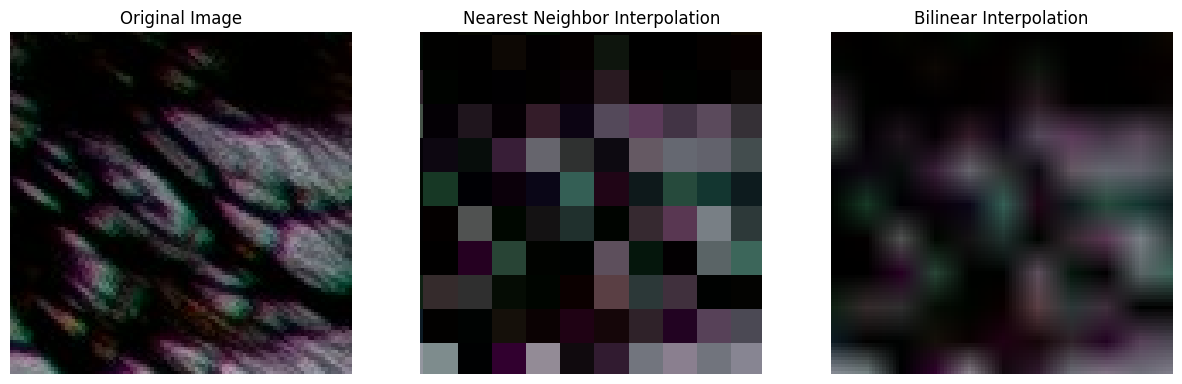

In [22]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(image_set[0][300:400, 300:400])
plt.axis('off')
plt.title('Original Image')
plt.subplot(1, 3, 2)
plt.imshow(nearest_neighbor_2d_image_set[0][300:400, 300:400])
plt.axis('off')
plt.title('Nearest Neighbor Interpolation')
plt.subplot(1, 3, 3)
plt.imshow(bilinear_2d_image_set[0][300:400, 300:400])
plt.axis('off')
plt.title('Bilinear Interpolation')
plt.show()

## 3. Avoid aliasing with a Low-Pass Filter
- Since the original image is typically not band-limited, apply a low-pass filter before downsampling.
- This make the image approximately band-limited, reducing aliasing artifacts.

### Apply LPF and downsampling

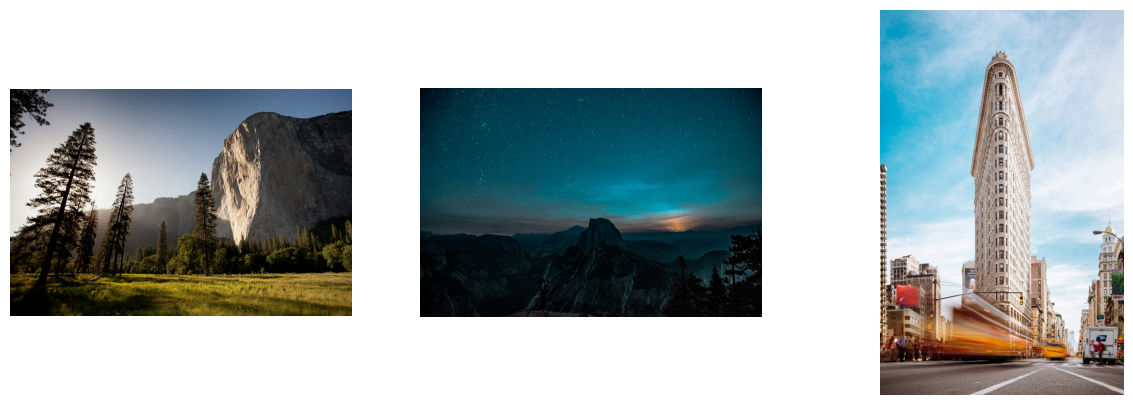

In [23]:
lpf_image_set = [cv2.GaussianBlur(image, (9, 9), 0) for image in image_set]

plt.figure(figsize=(15, 5))
for i, image in enumerate(lpf_image_set):
    plt.subplot(1, NUM_IMAGES, i + 1)
    plt.imshow(image)
    plt.axis('off')
plt.show()

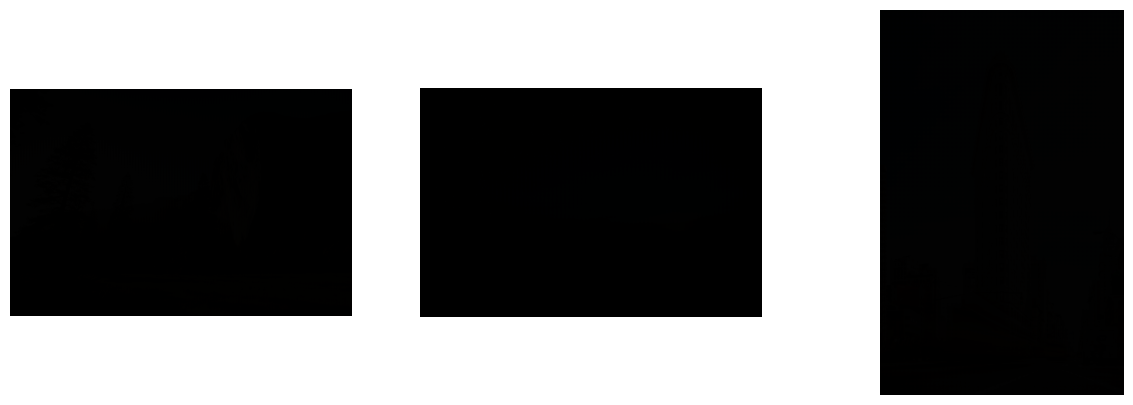

In [24]:
sampled_lpf_image_set = [sample_image(image, SAMPLING_N) for image in lpf_image_set]

plt.figure(figsize=(15, 5))
for i, image in enumerate(sampled_lpf_image_set):
    plt.subplot(1, NUM_IMAGES, i + 1)
    plt.imshow(image)
    plt.axis('off')
plt.show()

### Apply decimation

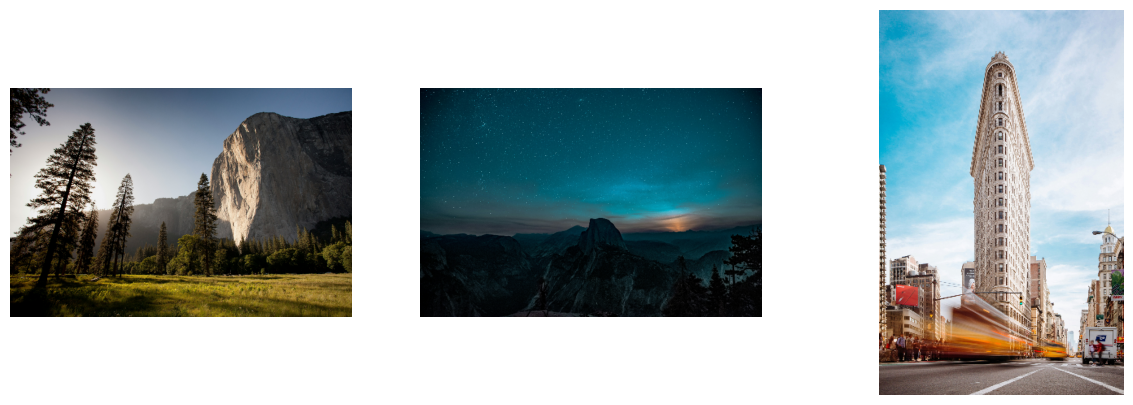

In [25]:
decimated_lpf_image_set = [decimation(image, SAMPLING_N) for image in lpf_image_set]

plt.figure(figsize=(15, 5))
for i, image in enumerate(decimated_lpf_image_set):
    plt.subplot(1, NUM_IMAGES, i + 1)
    plt.imshow(image)
    plt.axis('off')
plt.show()

## 4. Repeat Step 1 and 2 to the Band-Limited Image.
- Apply downsampling and interpolation method.
- Compare and discuss the result.

### Apply **nearest-neighbor** and **bilinear** interpolation

In [26]:
nearest_neighbor_2d_lpf_image_set = [conv2d(image, nearest_neighbor_kernel(SAMPLING_N)) for image in sampled_lpf_image_set]
bilinear_2d_lpf_image_set = [conv2d(image, bilinear_kernel(SAMPLING_N)) for image in sampled_lpf_image_set]

### Compare and discuss the result

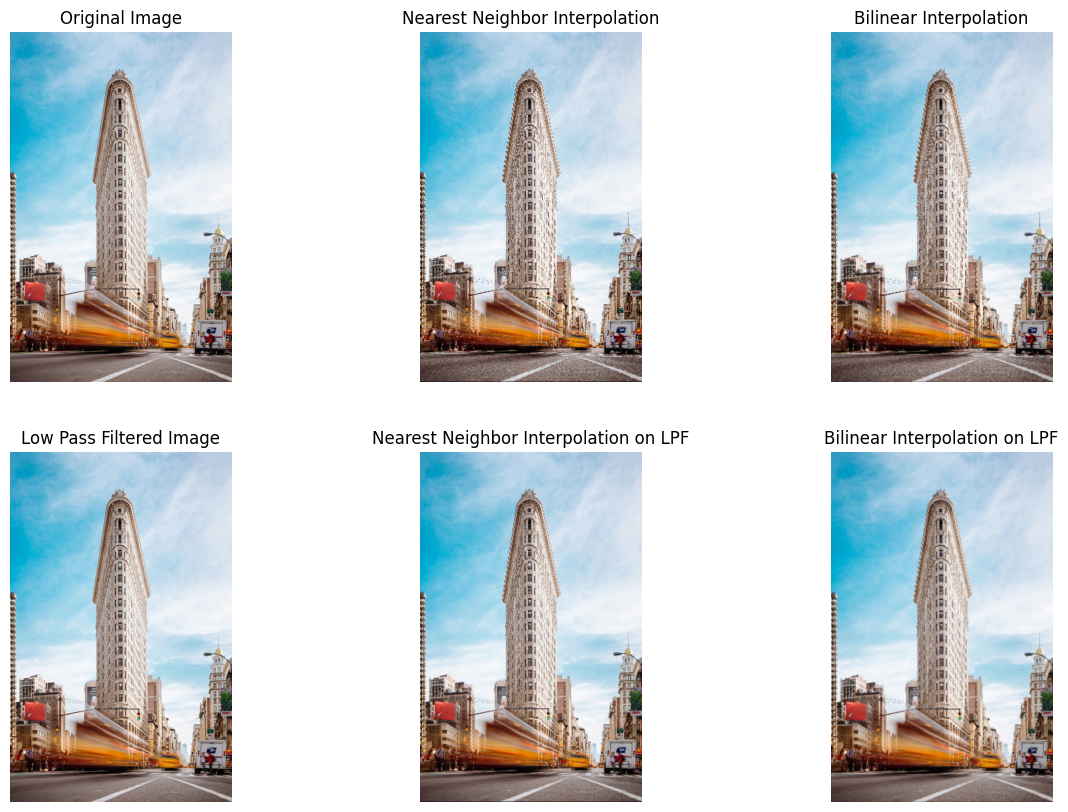

In [27]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
plt.imshow(image_set[2])
plt.axis('off')
plt.title('Original Image')
plt.subplot(2, 3, 2)
plt.imshow(nearest_neighbor_2d_image_set[2])
plt.axis('off')
plt.title('Nearest Neighbor Interpolation')
plt.subplot(2, 3, 3)
plt.imshow(bilinear_2d_image_set[2])
plt.axis('off')
plt.title('Bilinear Interpolation')
plt.subplot(2, 3, 4)
plt.imshow(lpf_image_set[2])
plt.axis('off')
plt.title('Low Pass Filtered Image')
plt.subplot(2, 3, 5)
plt.imshow(nearest_neighbor_2d_lpf_image_set[2])
plt.axis('off')
plt.title('Nearest Neighbor Interpolation on LPF')
plt.subplot(2, 3, 6)
plt.imshow(bilinear_2d_lpf_image_set[2])
plt.axis('off')
plt.title('Bilinear Interpolation on LPF')
plt.show()

We can see that the LPF and bilinear interpolation version is more smoother and has less aliasing.  
This Observation comes from difference of the Nyquist frequency, the aliasing comes from the decrease of the Nyquist frequency. So, If we reduce the high frequency, amplitude of the frequency over the Nyquist frequency is decreased and aliasing also decreased.  
Therefore, we can observe that if we apply LPF then apply bilinear interpolation, then the result image has less aliasing.